In [2]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
!pip install scikit-plot

In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.0 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.tree import DecisionTreeClassifier 
import scikitplot as skplt
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score, KFold,RepeatedKFold, GridSearchCV, RandomizedSearchCV, StratifiedKFold

import shap

import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.feature_selection import SelectKBest,chi2, SelectFromModel, RFE
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
import matplotlib.pyplot as plt

In [5]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## Tupan

In [6]:
df_tupan1 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Tupan/fixed_dataset_tupan11.csv')
df_tupan2 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Tupan/fixed_dataset_tupan12.csv')

In [7]:
df_tupan1.head()

,cnpj,cnae,capital_social,porte,secao,divisao,grupo,classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,secao1,divisao1,grupo1,classe1,secao2,divisao2,grupo2,classe2,secao3,divisao3,grupo3,classe3,secao4,divisao4,grupo4,classe4,secao5,divisao5,grupo5,classe5,target
0,35.481.586/0001-38,4744099,3000.0,1,7,47,474,47440,1197,4744004,9329803,4744099,4744099,4744099,7,47,474,47440,18,93,932,93298,7,47,474,47440,7,47,474,47440,7,47,474,47440,1
1,35.481.679/0001-62,4672900,50000.0,1,7,46,467,46729,1197,4642702,4669901,4673700,4672900,4672900,7,46,464,46427,7,46,466,46699,7,46,467,46737,7,46,467,46729,7,46,467,46729,1
2,35.485.932/0001-56,4712100,10000.0,1,7,47,471,47121,1196,4722901,4724500,4712100,4712100,4712100,7,47,472,47229,7,47,472,47245,7,47,471,47121,7,47,471,47121,7,47,471,47121,1
3,35.500.163/0001-18,4744099,100000.0,1,7,47,474,47440,1195,4712100,4744001,4744004,4744099,4744099,7,47,471,47121,7,47,474,47440,7,47,474,47440,7,47,474,47440,7,47,474,47440,1
4,35.545.533/0001-33,4744099,70000.0,1,7,47,474,47440,1190,7732202,4744099,4744099,4744099,4744099,14,77,773,77322,7,47,474,47440,7,47,474,47440,7,47,474,47440,7,47,474,47440,1


In [ ]:
df_tupan1.shape

(814548, 35)

In [ ]:
df_tupan2.shape

(814545, 35)

### Balanceando os datasets

In [ ]:
df_tupan1.target.value_counts()

1    594483
0    220065
Name: target, dtype: int64

total class of 1 e 0 treino: 0    220065
1    220065
Name: target, dtype: int64


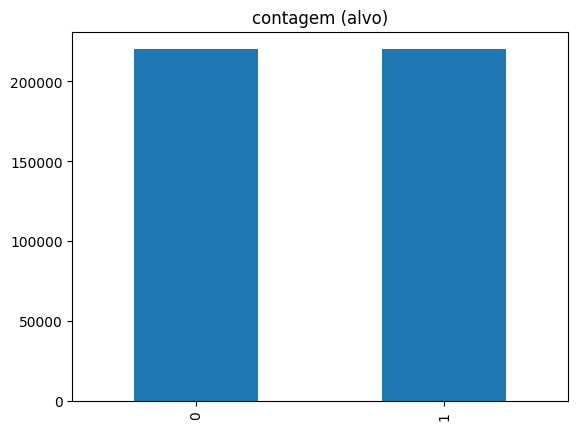

In [8]:
class_count_11, class_count_01 = df_tupan1['target'].value_counts()
class_01 = df_tupan1[df_tupan1['target'] == 0]
class_11 = df_tupan1[df_tupan1['target'] == 1]
class_11_under = class_11.sample(class_count_01)

test_under1 = pd.concat([class_01,class_11_under], axis=0)

print("total class of 1 e 0 treino:",test_under1['target'].value_counts())
test_under1['target'].value_counts().plot(kind='bar', title='contagem (alvo)');

In [ ]:
df_tupan2.target.value_counts()

1    633434
0    181111
Name: target, dtype: int64

In [ ]:
class_count_01

220065

total class of 1 e 0 teste: 0    94313
1    94313
Name: target, dtype: int64


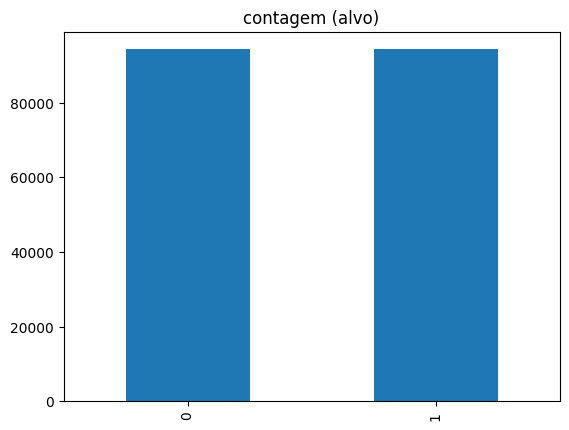

In [9]:
class_count_12, class_count_02 = df_tupan2['target'].value_counts()
class_02 = df_tupan2[df_tupan2['target'] == 0]
class_12 = df_tupan2[df_tupan2['target'] == 1]

#pegar 30% do valor do dataset 1
count30 = int(class_count_01*30/70)
class_12_under = class_12.sample(count30)
class_02_under = class_02.sample(count30)

test_under2 = pd.concat([class_02_under,class_12_under], axis=0)

print("total class of 1 e 0 teste:",test_under2['target'].value_counts())
test_under2['target'].value_counts().plot(kind='bar', title='contagem (alvo)');

### Analisando dados

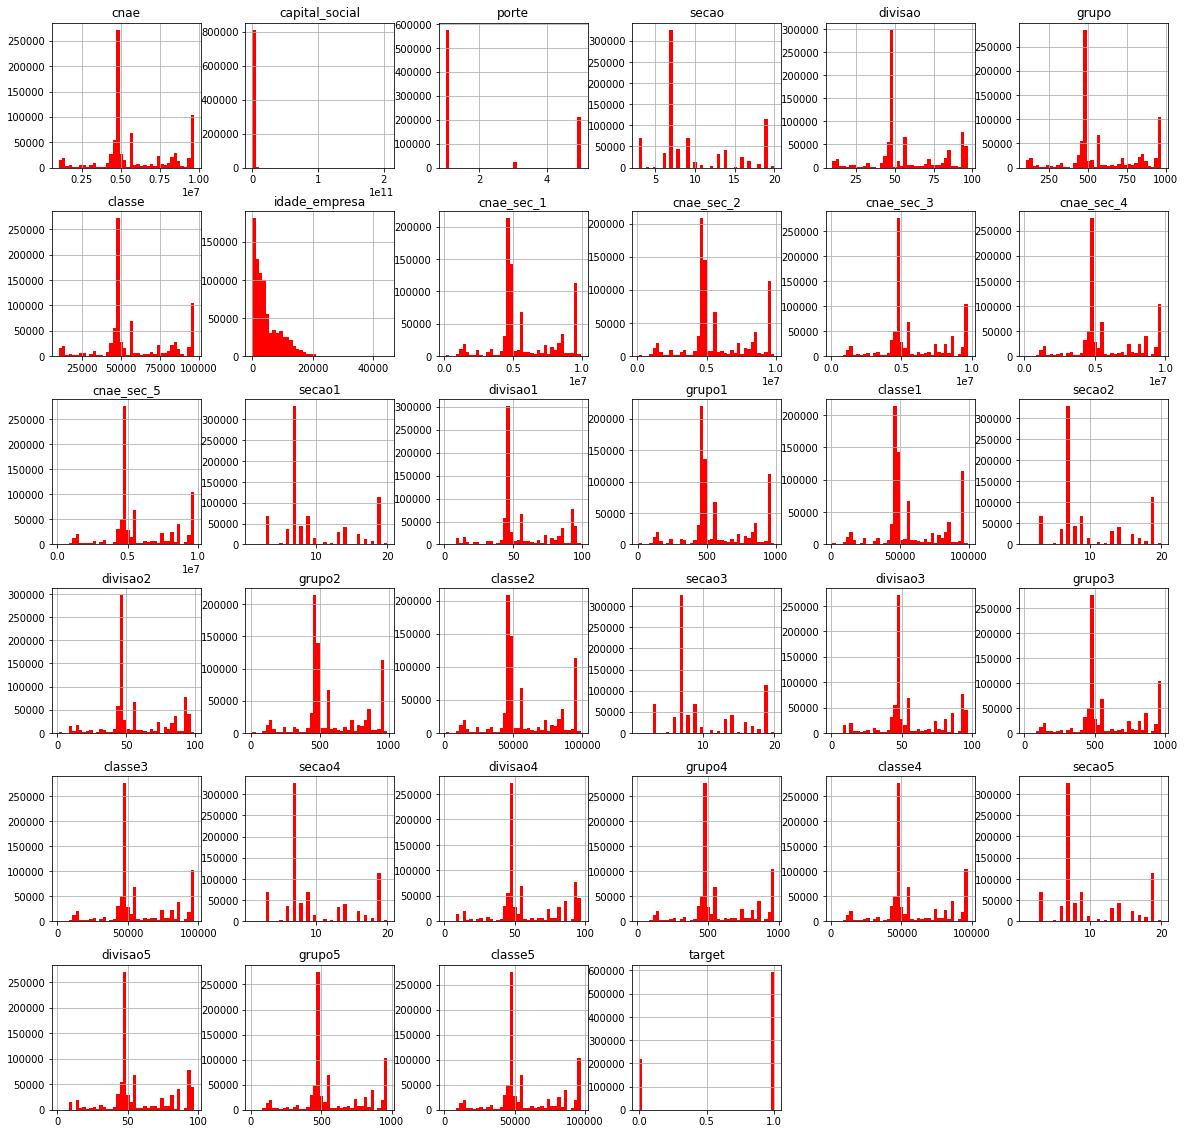

In [ ]:
df_tupan1.hist(bins = 40, figsize=(20,20), color = 'r');

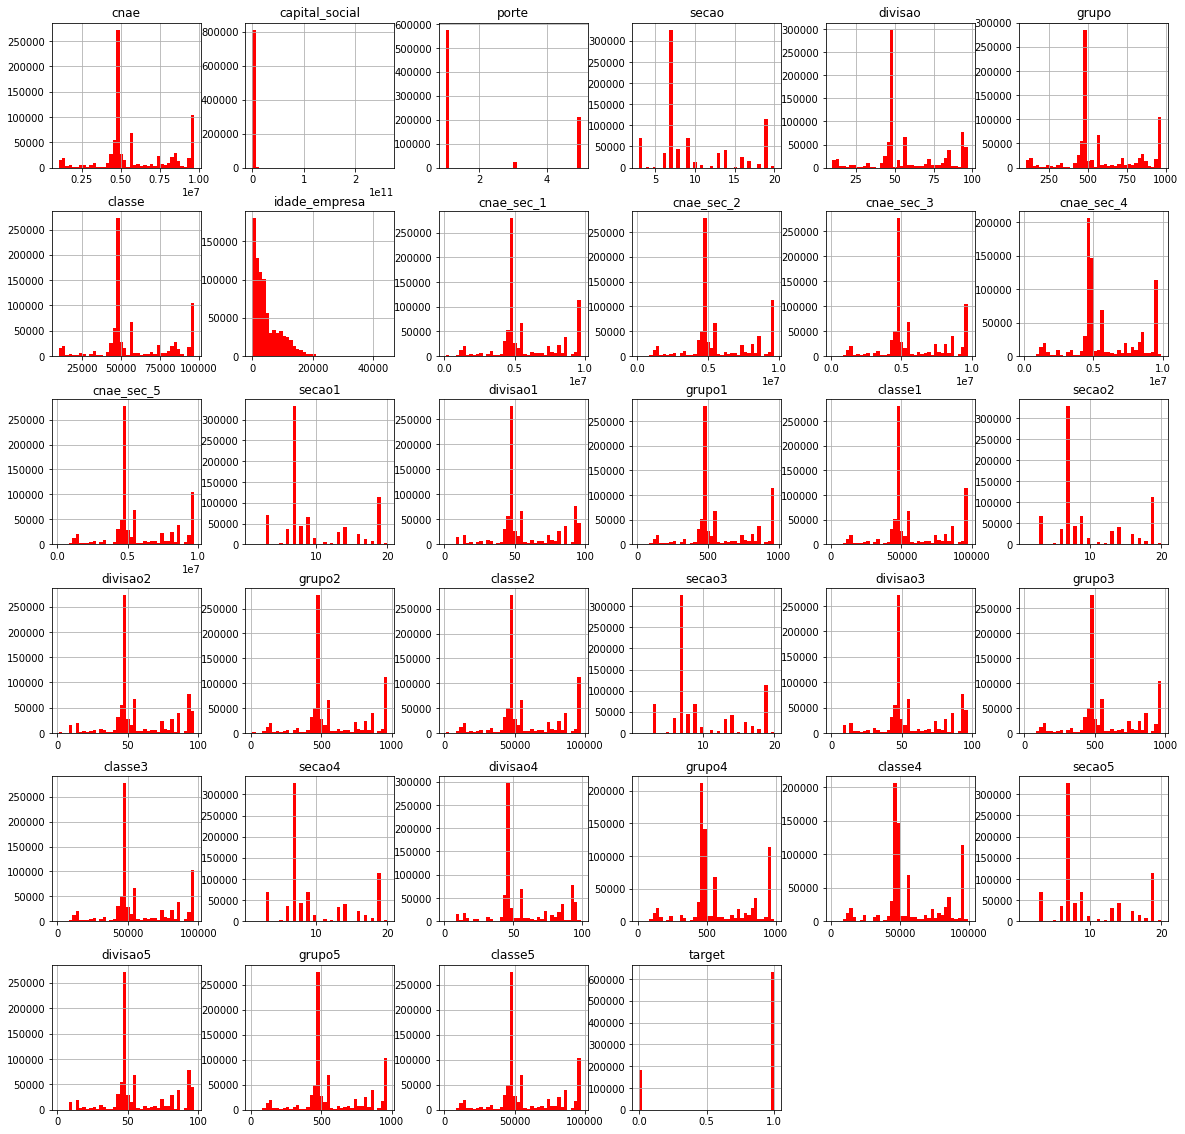

In [ ]:
df_tupan2.hist(bins = 40, figsize=(20,20), color = 'r');

In [ ]:
def plot_histogram(dataframe, x, y, color, width, height):
  fig = px.histogram(dataframe, x=x, y=y, color=color, width=width, 
                     height=height, color_discrete_sequence=['blue', 'red'])
  fig.update_layout(barmode='group', 
                    xaxis={'categoryorder': 'total descending'}, 
                    font=dict(size=12))
  fig.show()

In [ ]:
plot_histogram(df_tupan1, 'idade_empresa', None, 'target', 900, 500)

Output hidden; open in https://colab.research.google.com to view.

### Separando treino e teste

In [11]:
y_train = test_under1['target']
X_train = test_under1[test_under1.columns.difference(['cnpj','target'])]

In [12]:
y_test = test_under2['target']
X_test = test_under2[test_under2.columns.difference(['cnpj','target'])]

### XGboost

In [ ]:
# Parâmetros da POC
# (colsample_bytree=0.8, gamma=1.5, 
# learning_rate=0.02, max_depth=5,
# n_estimators=600, nthread=1, silent=True, 
# subsample=0.6, random_state = 42)

In [ ]:
modelo = XGBClassifier()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='f1_macro')
scores

array([0.83480527, 0.85450766, 0.83363142, 0.83479798, 0.85664533])

In [ ]:
scores.mean(), scores.std()

(0.8428775318651821, 0.010399458821182572)

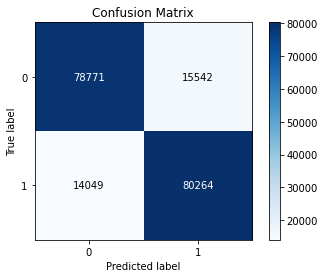

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84     94313
           1       0.84      0.85      0.84     94313

    accuracy                           0.84    188626
   macro avg       0.84      0.84      0.84    188626
weighted avg       0.84      0.84      0.84    188626



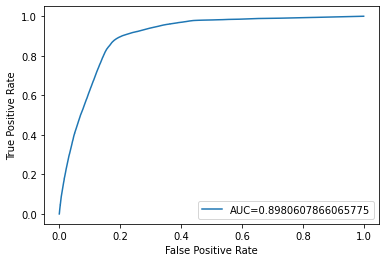

In [ ]:
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#### SHAP

In [ ]:
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_test)
np.abs(shap_values.sum(1) + explainer.expected_value - y_pred).max()

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:122: UserWarning:

ntree_limit is deprecated, use `iteration_range` or model slicing instead.



7.190548896789551

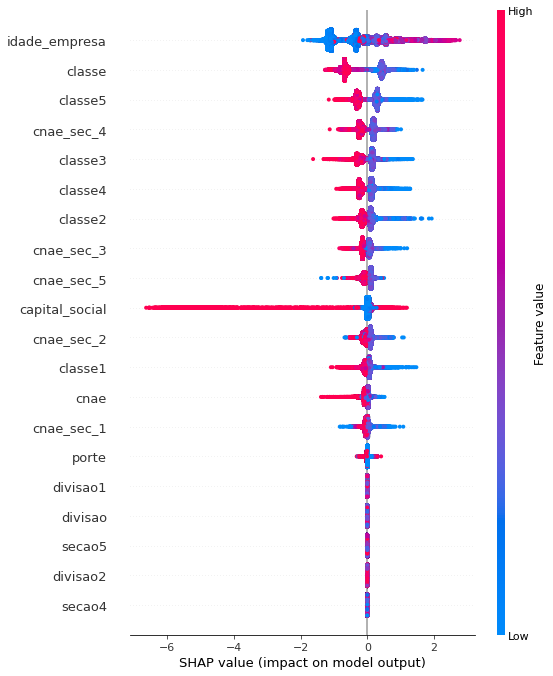

In [ ]:
shap.summary_plot(shap_values, X_test)

#### Gridsearch XGB

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8]
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=grid, n_iter=param_comb, 
                             scoring='f1_macro', n_jobs=4, 
                             cv=skf.split(X_train,y_train), 
                             verbose=3, random_state=1001)

start_time = timer(None) 
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[19:53:48] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.


 Time taken: 2 hours 32 minutes and 30.35 seconds.


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-02.csv', index=False)


 All results:
{'mean_fit_time': array([1968.00721121, 2468.59827447, 2630.12236365, 1714.67938399,
       1670.13385161]), 'std_fit_time': array([  6.71522445,  28.21763053,   6.78020587,  21.66737719,
       208.42060711]), 'mean_score_time': array([11.06241433, 16.69378495, 13.5886275 , 10.84882569,  6.41296649]), 'std_score_time': array([1.0614279 , 0.49391455, 0.41276252, 0.84050677, 2.88399059]), 'param_subsample': masked_array(data=[0.6, 0.8, 0.8, 1.0, 0.6],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[1, 10, 5, 1, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 8, 7, 6, 7],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.5, 1.5, 5, 1, 1.5],
             mask=[False, False, False, Fal

In [ ]:
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_subsample,param_min_child_weight,param_max_depth,param_gamma,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1968.007211,6.715224,11.062414,1.061428,0.6,1,6,0.5,0.8,"{'subsample': 0.6, 'min_child_weight': 1, 'max...",0.848452,0.848260,0.849830,0.848847,0.000699,5
1,2468.598274,28.217631,16.693785,0.493915,0.8,10,8,1.5,0.8,"{'subsample': 0.8, 'min_child_weight': 10, 'ma...",0.848867,0.848349,0.850305,0.849174,0.000827,2
2,2630.122364,6.780206,13.588627,0.412763,0.8,5,7,5,1.0,"{'subsample': 0.8, 'min_child_weight': 5, 'max...",0.848619,0.848434,0.850277,0.849110,0.000829,3
3,1714.679384,21.667377,10.848826,0.840507,1.0,1,6,1,0.8,"{'subsample': 1.0, 'min_child_weight': 1, 'max...",0.848361,0.848423,0.850407,0.849064,0.000950,4
4,1670.133852,208.420607,6.412966,2.883991,0.6,1,7,1.5,0.8,"{'subsample': 0.6, 'min_child_weight': 1, 'max...",0.848732,0.848364,0.850576,0.849224,0.000968,1


In [ ]:
modelo = XGBClassifier(subsample=0.6, min_child_weight=1, max_depth=7, gamma=1.5, colsample_bytree=0.8)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='f1_macro')
scores

KeyboardInterrupt: ignored

In [ ]:
scores.mean(), scores.std()

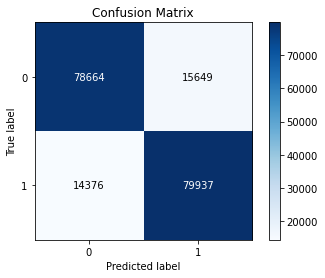

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84     94313
           1       0.84      0.85      0.84     94313

    accuracy                           0.84    188626
   macro avg       0.84      0.84      0.84    188626
weighted avg       0.84      0.84      0.84    188626



#### Feature Selection

In [ ]:
len(X_train.columns)

33

In [ ]:
selector1 = SelectKBest(chi2, k =15)
X_new1 = selector1.fit_transform(X_train, y_train)
lista1 = list(X_train.columns[selector1.get_support()])
lista1

['capital_social',
 'classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'grupo5',
 'idade_empresa']

In [ ]:
len(lista1)

15

In [ ]:
rfe_selector = RFE(estimator= XGBClassifier(),n_features_to_select = 15, step = 1)
X_new2= rfe_selector.fit(X_train, y_train)
lista2 = list(X_train.columns[rfe_selector.get_support()])
lista2

['capital_social',
 'classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'idade_empresa',
 'porte']

In [ ]:
sfm_selector = SelectFromModel(estimator=XGBClassifier(max_features='log2'))
X_new3 = sfm_selector.fit(X_train, y_train)
lista3 = list(X_train.columns[sfm_selector.get_support()])
lista3

[13:42:45] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



['classe', 'classe5', 'cnae_sec_3', 'cnae_sec_4', 'cnae_sec_5']

In [ ]:
list_total = lista1 + lista2 + lista3

In [ ]:
def count_element_list(list_input, Name_second_column = 'Numbers'):
  """
  Função que conta os elementos de uma lista de objetos. A saída é um DataFrame
  """

  from collections import Counter

 
  counting_features = dict(Counter(list_input))

  sorted_dict = {}
  sorted_keys = sorted(counting_features, key = counting_features.get, reverse = True) 

  for w in sorted_keys:
      sorted_dict[w] = counting_features[w]

  df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features', Name_second_column])
  
  return df


def enumerate_position(list_input):
  """
  função que enumera os elementos de uma lista de objetos. A saída é um DataFrame
  """

  from itertools import count
  indice = count() 
  dic = {k:next(indice)+1 for k in list_input}

  sorted_dict = {}
  sorted_keys = sorted(list_input, key = dic.get, reverse = False) 

  for w in sorted_keys:
    sorted_dict[w] = dic[w]
  
  df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features','Position'])

  return df


def sort_dict_key(dictionary, reverse_order = False, Name_second_column = None):
  """
  Função para classificar um dicionário por uma chave. A saída é um DataFrame
  """
  sorted_dict = {}
  sorted_keys = sorted(dictionary, key = dictionary.get, reverse = reverse_order) 

  for w in sorted_keys:
    sorted_dict[w] = dictionary[w]
    df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features', Name_second_column])

  return df

In [ ]:
df_count_numbers = count_element_list(list_total)

In [ ]:
df_list1_enum = enumerate_position(lista1)
df_list2_enum = enumerate_position(lista2)
df_list3_enum = enumerate_position(lista3)
frames = [df_list1_enum , df_list2_enum , df_list3_enum ]
result = pd.concat(frames)

all_features_select = list(result['Features'].unique())

position = dict()
for i in all_features_select:
  x = result.loc[result['Features'] == i, 'Position'].mean()
  position[i] = x

for i in all_features_select:
  x = result.loc[result['Features'] == i, 'Position'].mean()
  position[i] = x

df_top_position = sort_dict_key(position, reverse_order= False, Name_second_column= 'Top position')

In [ ]:
column_final = []
for i in df_top_position['Features']:
  a = int(df_count_numbers[ df_count_numbers['Features'] == i ].iloc[:,1])
  column_final.append(a)

df_top_position['Times that appears'] = column_final
df_top_position

,Features,Top position,Times that appears
0,capital_social,1.000000,2
1,classe,1.666667,3
2,classe1,3.000000,2
3,classe2,4.000000,2
4,classe3,5.000000,2
5,classe5,5.333333,3
6,classe4,6.000000,2
7,cnae,8.000000,2
8,cnae_sec_3,8.333333,3
9,cnae_sec_1,9.000000,2


In [ ]:
df_top_position.sort_values(["Times that appears", "Features"], ascending=True)

,Features,Top position,Times that appears
13,grupo5,14.000000,1
15,porte,15.000000,1
0,capital_social,1.000000,2
2,classe1,3.000000,2
3,classe2,4.000000,2
4,classe3,5.000000,2
6,classe4,6.000000,2
7,cnae,8.000000,2
9,cnae_sec_1,9.000000,2
11,cnae_sec_2,10.000000,2


In [ ]:
selection1 = df_top_position.iloc[:, :] 
selection2 = selection1[ selection1['Times that appears'] >= 2]
selection2

,Features,Top position,Times that appears
0,capital_social,1.000000,2
1,classe,1.666667,3
2,classe1,3.000000,2
3,classe2,4.000000,2
4,classe3,5.000000,2
5,classe5,5.333333,3
6,classe4,6.000000,2
7,cnae,8.000000,2
8,cnae_sec_3,8.333333,3
9,cnae_sec_1,9.000000,2


In [ ]:
features_selected = []
for w in selection2['Features']:
  features_selected.append(w)
features_selected, len(features_selected)

(['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe5',
  'classe4',
  'cnae',
  'cnae_sec_3',
  'cnae_sec_1',
  'cnae_sec_4',
  'cnae_sec_2',
  'cnae_sec_5',
  'idade_empresa'],
 14)

#### Modelo final

In [13]:
X_train = X_train[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]
X_test = X_test[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]

In [14]:
#usando os mesmos parametros da vetbr
modelo = XGBClassifier(subsample=1.0, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

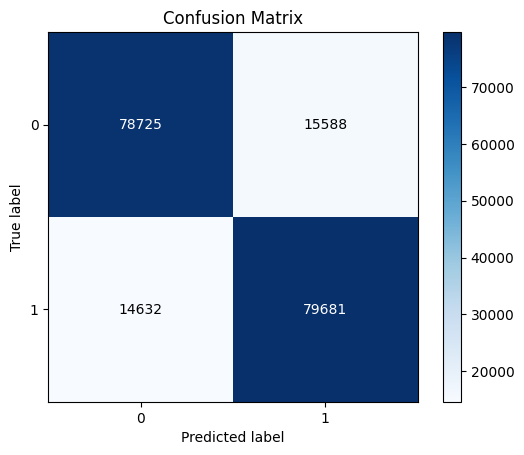

In [15]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     94313
           1       0.84      0.84      0.84     94313

    accuracy                           0.84    188626
   macro avg       0.84      0.84      0.84    188626
weighted avg       0.84      0.84      0.84    188626



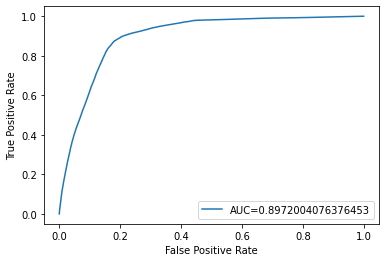

In [ ]:
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Vetbr

In [ ]:
df_vetbr1 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/new_dataset_vetbr_1ano11.csv')
df_vetbr2 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/new_dataset_vetbr_1ano12.csv')

In [ ]:
df_vetbr1.head()

,cnpj,cnae,capital_social,porte,secao,divisao,grupo,classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,secao1,divisao1,grupo1,classe1,secao2,divisao2,grupo2,classe2,secao3,divisao3,grupo3,classe3,secao4,divisao4,grupo4,classe4,secao5,divisao5,grupo5,classe5,target
0,35.509.080/0001-90,4744099,1000.0,1,7,47,474,47440,1202,4541206,4721103,4530703,4789005,4744099,7,45,454,45412,7,47,472,47211,7,45,453,45307,7,47,478,47890,7,47,474,47440,1
1,35.949.077/0001-97,4789004,20000.0,1,7,47,478,47890,1145,4771704,9609208,4789004,4789004,4789004,7,47,477,47717,19,96,960,96092,7,47,478,47890,7,47,478,47890,7,47,478,47890,1
2,29.361.279/0001-10,9609208,3000.0,1,19,96,960,96092,1880,4623109,4644302,4771704,4789004,9609208,7,46,462,46231,7,46,464,46443,7,47,477,47717,7,47,478,47890,19,96,960,96092,1
3,32.770.456/0001-27,4744099,60000.0,1,7,47,474,47440,1474,4623106,4623109,4723700,4771704,4789002,7,46,462,46231,7,46,462,46231,7,47,472,47237,7,47,477,47717,7,47,478,47890,1
4,36.332.132/0001-68,9609208,5000.0,1,19,96,960,96092,1112,9609207,322104,159802,321304,4789004,19,96,960,96092,1,3,32,3221,1,1,15,1598,1,3,32,3213,7,47,478,47890,1


In [ ]:
df_vetbr1[df_vetbr1['cnpj'] == '35.589.544/0001-15']

,cnpj,cnae,capital_social,porte,secao,divisao,grupo,classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,secao1,divisao1,grupo1,classe1,secao2,divisao2,grupo2,classe2,secao3,divisao3,grupo3,classe3,secao4,divisao4,grupo4,classe4,secao5,divisao5,grupo5,classe5,target


In [ ]:
df_vetbr11 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/fixed_dataset_vetbr11.csv')
df_vetbr12 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/fixed_dataset_vetbr12.csv')

In [ ]:
df_vetbr1.shape, df_vetbr2.shape

((2898047, 35), (2898045, 35))

In [ ]:
df_vetbr1.target.value_counts()

0    1497395
1    1400652
Name: target, dtype: int64

In [ ]:
df_vetbr2.target.value_counts()

0    1502906
1    1395139
Name: target, dtype: int64

In [ ]:
df_vetbr11.shape, df_vetbr12.shape

((2898047, 35), (2898045, 35))

In [ ]:
df_vetbr11.target.value_counts()

0    1492596
1    1405451
Name: target, dtype: int64

In [ ]:
df_vetbr12.target.value_counts()

0    1498773
1    1399272
Name: target, dtype: int64

### Balanceando os datasets

In [ ]:
df_vetbr1.target.value_counts()

0    1497395
1    1400652
Name: target, dtype: int64

total class of 1 e 0 treino: 0    50000
1    50000
Name: target, dtype: int64


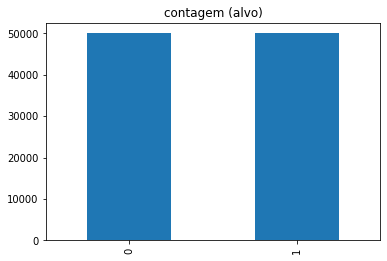

In [ ]:
class_count_01, class_count_11 = df_vetbr1['target'].value_counts()
class_01 = df_vetbr1[df_vetbr1['target'] == 0]
class_11 = df_vetbr1[df_vetbr1['target'] == 1]

class_11_under = class_11.sample(50000)
class_01_under = class_01.sample(50000)

test_under1 = pd.concat([class_01_under, class_11_under], axis=0)

print("total class of 1 e 0 treino:",test_under1['target'].value_counts())
test_under1['target'].value_counts().plot(kind='bar', title='contagem (alvo)');

In [ ]:
df_vetbr2.target.value_counts()

0    1502906
1    1395139
Name: target, dtype: int64

In [ ]:
len(class_01_under)

50000

total class of 1 e 0 teste: 0    21428
1    21428
Name: target, dtype: int64


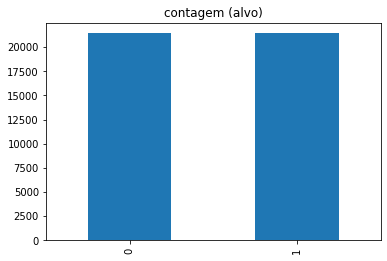

In [ ]:
class_count_02, class_count_12 = df_vetbr2['target'].value_counts()
class_02 = df_vetbr2[df_vetbr2['target'] == 0]
class_12 = df_vetbr2[df_vetbr2['target'] == 1]

#pegar 30% do valor do dataset 1
count30 = int(len(class_01_under)*30/70)
class_12_under = class_12.sample(count30)
class_02_under = class_02.sample(count30)

test_under2 = pd.concat([class_02_under,class_12_under], axis=0)

print("total class of 1 e 0 teste:",test_under2['target'].value_counts())
test_under2['target'].value_counts().plot(kind='bar', title='contagem (alvo)');

### Separando treino e teste

In [ ]:
y_train = test_under1['target']
X_train = test_under1[test_under1.columns.difference(['cnpj','target'])]

In [ ]:
y_test = test_under2['target']
X_test = test_under2[test_under2.columns.difference(['cnpj','target'])]

### Normalizando dados

In [ ]:
from sklearn import preprocessing


d = preprocessing.normalize(X_train)
X_train = pd.DataFrame(d)

In [ ]:
d1 = preprocessing.normalize(X_test)
X_test = pd.DataFrame(d1)

### XGboost

In [ ]:
# Parâmetros da POC
# (colsample_bytree=0.8, gamma=1.5, 
# learning_rate=0.02, max_depth=5,
# n_estimators=600, nthread=1, silent=True, 
# subsample=0.6, random_state = 42)

In [ ]:
modelo = XGBClassifier()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='f1_macro')
scores

array([0.61257219, 0.61355179, 0.61059842, 0.6108481 , 0.6087521 ])

In [ ]:
scores.mean(), scores.std()

(0.6112645206963045, 0.0016655891057925365)

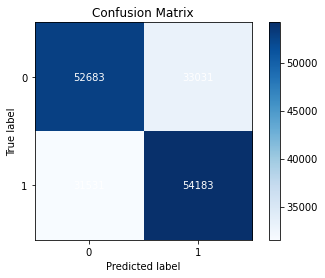

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.61      0.62     85714
           1       0.62      0.63      0.63     85714

    accuracy                           0.62    171428
   macro avg       0.62      0.62      0.62    171428
weighted avg       0.62      0.62      0.62    171428



#### SHAP

In [ ]:
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_test)
np.abs(shap_values.sum(1) + explainer.expected_value - y_pred).max()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


2.9986178874969482

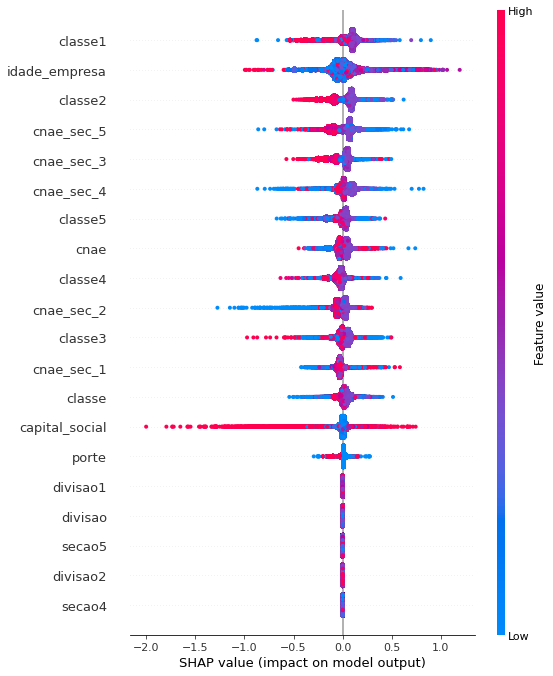

In [ ]:
shap.summary_plot(shap_values, X_test)

#### Gridsearch XGB

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
        'tree_method':['auto', 'exact', 'approx', 'hist']
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=5)

In [ ]:
folds = 3
param_comb = 5

skf = KFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=grid, n_iter=param_comb, 
                             scoring='f1_macro', n_jobs=4, 
                             cv=skf.split(X_train,y_train), 
                             verbose=3, random_state=1001)

start_time = timer(None) 
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[18:40:59] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.


 Time taken: 0 hours 42 minutes and 47.16 seconds.


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([ 635.62164156, 1053.79974524,   21.58524601,  740.15631795,
        498.89897823]), 'std_fit_time': array([  0.46167217,  85.32044902,   1.52250095, 170.47983245,
       144.48095963]), 'mean_score_time': array([2.90109444, 2.45387618, 1.0212543 , 7.49080388, 1.05754495]), 'std_score_time': array([0.19290617, 0.78289525, 0.05903042, 1.41226728, 0.74248554]), 'param_tree_method': masked_array(data=['exact', 'approx', 'hist', 'auto', 'auto'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.6, 1.0, 1.0, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[10, 10, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 8, 7, 8, 5],
             mask=[

In [ ]:
modelo = XGBClassifier(subsample=1.0, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train,cv=5, scoring='f1_macro')
scores

array([0.61123747, 0.60707786, 0.60987081, 0.60920245, 0.60997324])

In [ ]:
scores.mean(), scores.std()

(0.6094723662931553, 0.0013661443138029898)

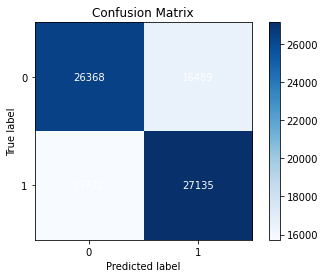

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.62      0.62     42857
           1       0.62      0.63      0.63     42857

    accuracy                           0.62     85714
   macro avg       0.62      0.62      0.62     85714
weighted avg       0.62      0.62      0.62     85714



#### Feature Selection

In [ ]:
len(X_train.columns)

33

In [ ]:
selector1 = SelectKBest(chi2, k =15)
X_new1 = selector1.fit_transform(X_train, y_train)
lista1 = list(X_train.columns[selector1.get_support()])
lista1

['capital_social',
 'classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'grupo3',
 'idade_empresa']

In [ ]:
len(lista1)

15

In [ ]:
rfe_selector = RFE(estimator= XGBClassifier(),n_features_to_select = 15, step = 1)
X_new2= rfe_selector.fit(X_train, y_train)
lista2 = list(X_train.columns[rfe_selector.get_support()])
lista2

['capital_social',
 'classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'idade_empresa',
 'porte']

In [ ]:
sfm_selector = SelectFromModel(estimator=XGBClassifier(max_features='log2'))
X_new3 = sfm_selector.fit(X_train, y_train)
lista3 = list(X_train.columns[sfm_selector.get_support()])
lista3

[19:53:43] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



['classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'idade_empresa',
 'porte']

In [ ]:
list_total = lista1 + lista2 + lista3

In [ ]:
def count_element_list(list_input, Name_second_column = 'Numbers'):
  """
  Função que conta os elementos de uma lista de objetos. A saída é um DataFrame
  """

  from collections import Counter

 
  counting_features = dict(Counter(list_input))

  sorted_dict = {}
  sorted_keys = sorted(counting_features, key = counting_features.get, reverse = True) 

  for w in sorted_keys:
      sorted_dict[w] = counting_features[w]

  df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features', Name_second_column])
  
  return df


def enumerate_position(list_input):
  """
  função que enumera os elementos de uma lista de objetos. A saída é um DataFrame
  """

  from itertools import count
  indice = count() 
  dic = {k:next(indice)+1 for k in list_input}

  sorted_dict = {}
  sorted_keys = sorted(list_input, key = dic.get, reverse = False) 

  for w in sorted_keys:
    sorted_dict[w] = dic[w]
  
  df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features','Position'])

  return df


def sort_dict_key(dictionary, reverse_order = False, Name_second_column = None):
  """
  Função para classificar um dicionário por uma chave. A saída é um DataFrame
  """
  sorted_dict = {}
  sorted_keys = sorted(dictionary, key = dictionary.get, reverse = reverse_order) 

  for w in sorted_keys:
    sorted_dict[w] = dictionary[w]
    df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features', Name_second_column])

  return df

In [ ]:
df_count_numbers = count_element_list(list_total)

In [ ]:
df_list1_enum = enumerate_position(lista1)
df_list2_enum = enumerate_position(lista2)
df_list3_enum = enumerate_position(lista3)
frames = [df_list1_enum , df_list2_enum , df_list3_enum ]
result = pd.concat(frames)

all_features_select = list(result['Features'].unique())

position = dict()
for i in all_features_select:
  x = result.loc[result['Features'] == i, 'Position'].mean()
  position[i] = x

for i in all_features_select:
  x = result.loc[result['Features'] == i, 'Position'].mean()
  position[i] = x

df_top_position = sort_dict_key(position, reverse_order= False, Name_second_column= 'Top position')

In [ ]:
column_final = []
for i in df_top_position['Features']:
  a = int(df_count_numbers[ df_count_numbers['Features'] == i ].iloc[:,1])
  column_final.append(a)

df_top_position['Times that appears'] = column_final
df_top_position

,Features,Top position,Times that appears
0,capital_social,1.000000,2
1,classe,1.666667,3
2,classe1,2.666667,3
3,classe2,3.666667,3
4,classe3,4.666667,3
5,classe4,5.666667,3
6,classe5,6.666667,3
7,cnae,7.666667,3
8,cnae_sec_1,8.666667,3
9,cnae_sec_2,9.666667,3


In [ ]:
df_top_position.sort_values(["Times that appears", "Features"], ascending=True)

,Features,Top position,Times that appears
13,grupo3,14.000000,1
0,capital_social,1.000000,2
15,porte,14.500000,2
1,classe,1.666667,3
2,classe1,2.666667,3
3,classe2,3.666667,3
4,classe3,4.666667,3
5,classe4,5.666667,3
6,classe5,6.666667,3
7,cnae,7.666667,3


In [ ]:
selection1 = df_top_position.iloc[:, :] 
selection2 = selection1[ selection1['Times that appears'] >= 2]
selection2

,Features,Top position,Times that appears
0,capital_social,1.000000,2
1,classe,1.666667,3
2,classe1,2.666667,3
3,classe2,3.666667,3
4,classe3,4.666667,3
5,classe4,5.666667,3
6,classe5,6.666667,3
7,cnae,7.666667,3
8,cnae_sec_1,8.666667,3
9,cnae_sec_2,9.666667,3


In [ ]:
features_selected = []
for w in selection2['Features']:
  features_selected.append(w)
features_selected, len(features_selected)

(['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa',
  'porte'],
 15)

In [ ]:
X_train = X_train[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]
X_test = X_test[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]

In [ ]:
modelo = XGBClassifier(subsample=1.0, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

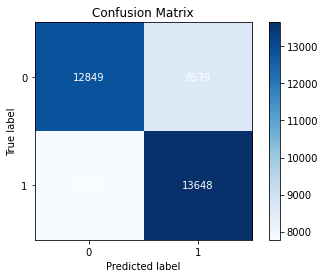

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61     21428
           1       0.61      0.64      0.63     21428

    accuracy                           0.62     42856
   macro avg       0.62      0.62      0.62     42856
weighted avg       0.62      0.62      0.62     42856



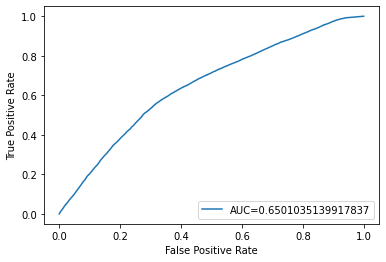

In [ ]:
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Recife Doces

In [ ]:
df_recife1 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Recife_Doces/fixed_dataset_recifedoces11.csv')
df_recife2 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Recife_Doces/fixed_dataset_recifedoces12.csv')

In [ ]:
df_recife1.shape

(811093, 35)

In [ ]:
df_recife2.shape

(811091, 35)

In [ ]:
df_recife1[df_recife1['cnpj'] == '35.615.094/0001-98']

,cnpj,cnae,capital_social,porte,secao,divisao,grupo,classe,idade_empresa,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,secao1,divisao1,grupo1,classe1,secao2,divisao2,grupo2,classe2,secao3,divisao3,grupo3,classe3,secao4,divisao4,grupo4,classe4,secao5,divisao5,grupo5,classe5,target


### Balanceando os datasets

In [ ]:
df_recife1.target.value_counts()

1    584775
0    226318
Name: target, dtype: int64

total class of 1 e 0 treino: 0    50000
1    50000
Name: target, dtype: int64


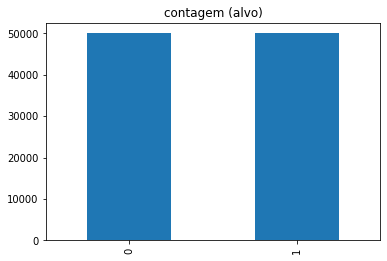

In [ ]:
class_count_01, class_count_11 = df_recife1['target'].value_counts()
class_01 = df_recife1[df_recife1['target'] == 0]
class_11 = df_recife1[df_recife1['target'] == 1]

class_11_under = class_11.sample(50000)
class_01_under = class_01.sample(50000)

test_under1 = pd.concat([class_01_under, class_11_under], axis=0)

print("total class of 1 e 0 treino:",test_under1['target'].value_counts())
test_under1['target'].value_counts().plot(kind='bar', title='contagem (alvo)');

total class of 1 e 0 teste: 0    21428
1    21428
Name: target, dtype: int64


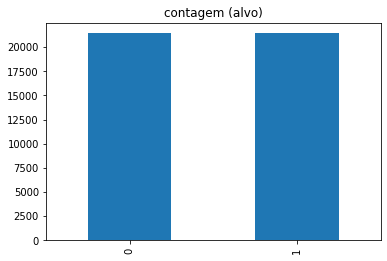

In [ ]:
class_count_02, class_count_12 = df_recife1['target'].value_counts()
class_02 = df_recife2[df_recife2['target'] == 0]
class_12 = df_recife2[df_recife2['target'] == 1]

#pegar 30% do valor do dataset 1
count30 = int(len(class_01_under)*30/70)
class_12_under = class_12.sample(count30)
class_02_under = class_02.sample(count30)

test_under2 = pd.concat([class_02_under,class_12_under], axis=0)

print("total class of 1 e 0 teste:",test_under2['target'].value_counts())
test_under2['target'].value_counts().plot(kind='bar', title='contagem (alvo)');

### Separando treino e teste

In [ ]:
y_train = test_under1['target']
X_train = test_under1[test_under1.columns.difference(['cnpj','target'])]

In [ ]:
y_test = test_under2['target']
X_test = test_under2[test_under2.columns.difference(['cnpj','target'])]

### XGboost

In [ ]:
# Parâmetros da POC
# (colsample_bytree=0.8, gamma=1.5, 
# learning_rate=0.02, max_depth=5,
# n_estimators=600, nthread=1, silent=True, 
# subsample=0.6, random_state = 42)

In [ ]:
modelo = XGBClassifier()
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='f1_macro')
scores

array([0.86713631, 0.86638214, 0.86411195, 0.86317415, 0.86963228])

In [ ]:
scores.mean(), scores.std()

(0.8660873652535018, 0.002286598699328854)

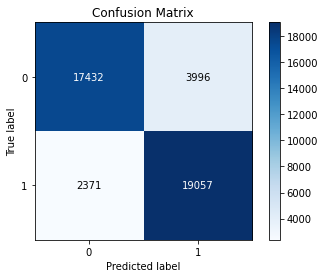

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.81      0.85     21428
           1       0.83      0.89      0.86     21428

    accuracy                           0.85     42856
   macro avg       0.85      0.85      0.85     42856
weighted avg       0.85      0.85      0.85     42856



#### SHAP

In [ ]:
explainer = shap.TreeExplainer(modelo)
shap_values = explainer.shap_values(X_test)
np.abs(shap_values.sum(1) + explainer.expected_value - y_pred).max()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


7.581029891967773

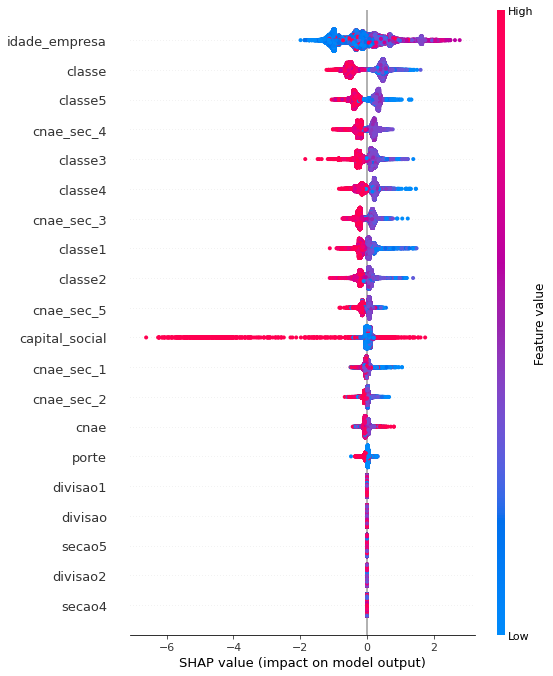

In [ ]:
shap.summary_plot(shap_values, X_test)

#### Gridsearch XGB

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8],
        'tree_method':['auto', 'exact', 'approx', 'hist']
        }

In [ ]:
xgb = XGBClassifier(learning_rate=0.02, n_estimators=600,
                    silent=True, nthread=5)

In [ ]:
folds = 3
param_comb = 5

skf = KFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=grid, n_iter=param_comb, 
                             scoring='f1_macro', n_jobs=4, 
                             cv=skf.split(X_train,y_train), 
                             verbose=3, random_state=1001)

start_time = timer(None) 
random_search.fit(X_train, y_train)
timer(start_time)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[19:38:05] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.


 Time taken: 0 hours 21 minutes and 40.79 seconds.


In [ ]:
print('\n All results:')
print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)
results = pd.DataFrame(random_search.cv_results_)
results.to_csv('xgb-random-grid-search-results-01.csv', index=False)


 All results:
{'mean_fit_time': array([280.57599886, 481.73984957,  16.42306018, 371.03256567,
       255.49590667]), 'std_fit_time': array([ 0.40354007, 31.41921818,  0.14253072, 77.21889501, 69.05688702]), 'mean_score_time': array([1.19834256, 1.52133314, 0.67535583, 2.97591043, 0.67080704]), 'std_score_time': array([0.32538086, 0.21646315, 0.03252987, 0.94423818, 0.41708659]), 'param_tree_method': masked_array(data=['exact', 'approx', 'hist', 'auto', 'auto'],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.6, 1.0, 1.0, 0.8, 1.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[10, 10, 1, 5, 1],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[6, 8, 7, 8, 5],
             mask=[False, False, Fal

In [ ]:
modelo = XGBClassifier(subsample=0.8, min_child_weight=5, max_depth=8, gamma=2, colsample_bytree=1.0)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train,cv=5, scoring='f1_macro')
scores

array([0.86587277, 0.86588953, 0.86266954, 0.86396528, 0.86708037])

In [ ]:
scores.mean(), scores.std()

(0.8650954992286293, 0.0015707997009938802)

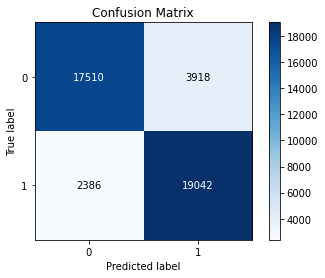

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     21428
           1       0.83      0.89      0.86     21428

    accuracy                           0.85     42856
   macro avg       0.85      0.85      0.85     42856
weighted avg       0.85      0.85      0.85     42856



#### Feature Selection

In [ ]:
len(X_train.columns)

33

In [ ]:
selector1 = SelectKBest(chi2, k =15)
X_new1 = selector1.fit_transform(X_train, y_train)
lista1 = list(X_train.columns[selector1.get_support()])
lista1

['capital_social',
 'classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'grupo5',
 'idade_empresa']

In [ ]:
len(lista1)

15

In [ ]:
rfe_selector = RFE(estimator= XGBClassifier(),n_features_to_select = 15, step = 1)
X_new2= rfe_selector.fit(X_train, y_train)
lista2 = list(X_train.columns[rfe_selector.get_support()])
lista2

['capital_social',
 'classe',
 'classe1',
 'classe2',
 'classe3',
 'classe4',
 'classe5',
 'cnae',
 'cnae_sec_1',
 'cnae_sec_2',
 'cnae_sec_3',
 'cnae_sec_4',
 'cnae_sec_5',
 'idade_empresa',
 'porte']

In [ ]:
sfm_selector = SelectFromModel(estimator=XGBClassifier(max_features='log2'))
X_new3 = sfm_selector.fit(X_train, y_train)
lista3 = list(X_train.columns[sfm_selector.get_support()])
lista3

[20:02:46] WARNING: ../src/learner.cc:767: 
Parameters: { "max_features" } are not used.



['classe', 'classe4', 'classe5']

In [ ]:
list_total = lista1 + lista2 + lista3

In [ ]:
def count_element_list(list_input, Name_second_column = 'Numbers'):
  """
  Função que conta os elementos de uma lista de objetos. A saída é um DataFrame
  """

  from collections import Counter

 
  counting_features = dict(Counter(list_input))

  sorted_dict = {}
  sorted_keys = sorted(counting_features, key = counting_features.get, reverse = True) 

  for w in sorted_keys:
      sorted_dict[w] = counting_features[w]

  df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features', Name_second_column])
  
  return df


def enumerate_position(list_input):
  """
  função que enumera os elementos de uma lista de objetos. A saída é um DataFrame
  """

  from itertools import count
  indice = count() 
  dic = {k:next(indice)+1 for k in list_input}

  sorted_dict = {}
  sorted_keys = sorted(list_input, key = dic.get, reverse = False) 

  for w in sorted_keys:
    sorted_dict[w] = dic[w]
  
  df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features','Position'])

  return df


def sort_dict_key(dictionary, reverse_order = False, Name_second_column = None):
  """
  Função para classificar um dicionário por uma chave. A saída é um DataFrame
  """
  sorted_dict = {}
  sorted_keys = sorted(dictionary, key = dictionary.get, reverse = reverse_order) 

  for w in sorted_keys:
    sorted_dict[w] = dictionary[w]
    df = pd.DataFrame(list(sorted_dict.items()),columns = ['Features', Name_second_column])

  return df

In [ ]:
df_count_numbers = count_element_list(list_total)

In [ ]:
df_list1_enum = enumerate_position(lista1)
df_list2_enum = enumerate_position(lista2)
df_list3_enum = enumerate_position(lista3)
frames = [df_list1_enum , df_list2_enum , df_list3_enum ]
result = pd.concat(frames)

all_features_select = list(result['Features'].unique())

position = dict()
for i in all_features_select:
  x = result.loc[result['Features'] == i, 'Position'].mean()
  position[i] = x

for i in all_features_select:
  x = result.loc[result['Features'] == i, 'Position'].mean()
  position[i] = x

df_top_position = sort_dict_key(position, reverse_order= False, Name_second_column= 'Top position')

In [ ]:
column_final = []
for i in df_top_position['Features']:
  a = int(df_count_numbers[ df_count_numbers['Features'] == i ].iloc[:,1])
  column_final.append(a)

df_top_position['Times that appears'] = column_final
df_top_position

,Features,Top position,Times that appears
0,capital_social,1.000000,2
1,classe,1.666667,3
2,classe1,3.000000,2
3,classe2,4.000000,2
4,classe4,4.666667,3
5,classe3,5.000000,2
6,classe5,5.666667,3
7,cnae,8.000000,2
8,cnae_sec_1,9.000000,2
9,cnae_sec_2,10.000000,2


In [ ]:
df_top_position.sort_values(["Times that appears", "Features"], ascending=True)

,Features,Top position,Times that appears
13,grupo5,14.000000,1
15,porte,15.000000,1
0,capital_social,1.000000,2
2,classe1,3.000000,2
3,classe2,4.000000,2
5,classe3,5.000000,2
7,cnae,8.000000,2
8,cnae_sec_1,9.000000,2
9,cnae_sec_2,10.000000,2
10,cnae_sec_3,11.000000,2


In [ ]:
selection1 = df_top_position.iloc[:, :] 
selection2 = selection1[ selection1['Times that appears'] >= 2]
selection2

,Features,Top position,Times that appears
0,capital_social,1.000000,2
1,classe,1.666667,3
2,classe1,3.000000,2
3,classe2,4.000000,2
4,classe4,4.666667,3
5,classe3,5.000000,2
6,classe5,5.666667,3
7,cnae,8.000000,2
8,cnae_sec_1,9.000000,2
9,cnae_sec_2,10.000000,2


In [ ]:
features_selected = []
for w in selection2['Features']:
  features_selected.append(w)
features_selected, len(features_selected)

(['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe4',
  'classe3',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa'],
 14)

In [ ]:
X_train = X_train[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]
X_test = X_test[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe3',
  'classe4',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]

In [ ]:
modelo = XGBClassifier(subsample=1.0, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

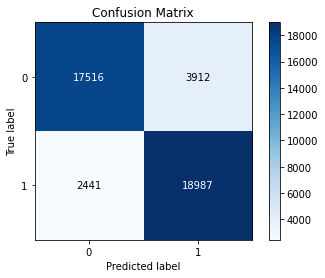

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85     21428
           1       0.83      0.89      0.86     21428

    accuracy                           0.85     42856
   macro avg       0.85      0.85      0.85     42856
weighted avg       0.85      0.85      0.85     42856



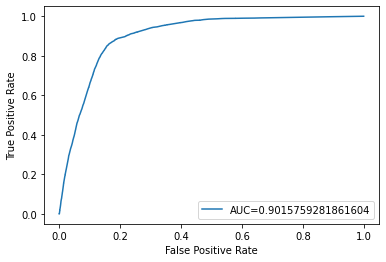

In [ ]:
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Farmix

In [ ]:
df_farmix1 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Farmix/new_dataset_farmix11.csv')
df_farmix2 = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Farmix/new_dataset_farmix12.csv')

In [ ]:
df_farmix1.shape

(2898047, 35)

In [ ]:
df_farmix2.shape

(2898045, 35)

### Balanceando os datasets

In [ ]:
df_farmix1.target.value_counts()

1    2231131
0     666916
Name: target, dtype: int64

total class of 1 e 0 treino: 0    50000
1    50000
Name: target, dtype: int64


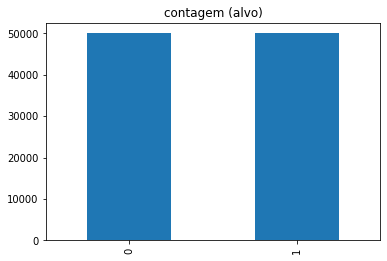

In [ ]:
class_count_01, class_count_11 = df_farmix1['target'].value_counts()
class_01 = df_farmix1[df_farmix1['target'] == 0]
class_11 = df_farmix1[df_farmix1['target'] == 1]

class_11_under = class_11.sample(50000)
class_01_under = class_01.sample(50000)

test_under1 = pd.concat([class_01_under, class_11_under], axis=0)

print("total class of 1 e 0 treino:",test_under1['target'].value_counts())
test_under1['target'].value_counts().plot(kind='bar', title='contagem (alvo)');

In [ ]:
df_farmix2.target.value_counts()

1    1939269
0     958776
Name: target, dtype: int64

In [ ]:
len(class_01_under)

50000

total class of 1 e 0 teste: 0    21428
1    21428
Name: target, dtype: int64


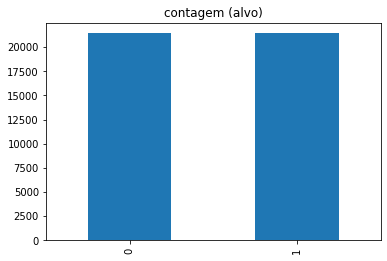

In [ ]:
class_count_02, class_count_12 = df_farmix2['target'].value_counts()
class_02 = df_farmix2[df_farmix2['target'] == 0]
class_12 = df_farmix2[df_farmix2['target'] == 1]

#pegar 30% do valor do dataset 1
count30 = int(len(class_01_under)*30/70)
class_12_under = class_12.sample(count30)
class_02_under = class_02.sample(count30)

test_under2 = pd.concat([class_02_under,class_12_under], axis=0)

print("total class of 1 e 0 teste:",test_under2['target'].value_counts())
test_under2['target'].value_counts().plot(kind='bar', title='contagem (alvo)');

### Separando treino e teste

In [ ]:
y_train = test_under1['target']
X_train = test_under1[test_under1.columns.difference(['cnpj','target'])]

In [ ]:
y_test = test_under2['target']
X_test = test_under2[test_under2.columns.difference(['cnpj','target'])]

### XGboost

In [ ]:
X_train = X_train[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe4',
  'classe3',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]
X_test = X_test[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe4',
  'classe3',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]

In [ ]:
modelo = XGBClassifier(subsample=1.0, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0)
modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)

In [ ]:
scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='f1_macro')
scores

array([0.84026751, 0.83915227, 0.83300699, 0.83544186, 0.83750873])

In [ ]:
scores.mean(), scores.std()

(0.837075471652377, 0.002604270399529521)

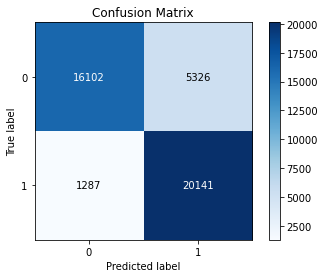

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83     21428
           1       0.79      0.94      0.86     21428

    accuracy                           0.85     42856
   macro avg       0.86      0.85      0.84     42856
weighted avg       0.86      0.85      0.84     42856



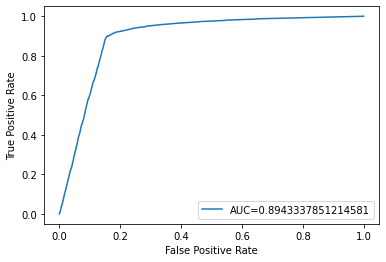

In [ ]:
y_pred_proba = modelo.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## Modelo final

In [ ]:
X_train = X_train[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe4',
  'classe3',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]
X_test = X_test[['capital_social',
  'classe',
  'classe1',
  'classe2',
  'classe4',
  'classe3',
  'classe5',
  'cnae',
  'cnae_sec_1',
  'cnae_sec_2',
  'cnae_sec_3',
  'cnae_sec_4',
  'cnae_sec_5',
  'idade_empresa']]

In [ ]:
modelo = XGBClassifier(subsample=1.0, min_child_weight=1, max_depth=5, gamma=5, colsample_bytree=1.0)

**Os clientes heterogêneos tem mais chance do modelo errar, já que os dados não tem um padrão definido, então, testar novamente quais parâmetros se adequam e quais atributos também, pois na Vetbr a Feature Selection acrescentou o atributo "porte" na sua seleção.**

## Exemplo pra salvar o modelo de cada cliente

In [18]:
import pickle

In [19]:
# salvando modelo no disco
filename = '/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Tupan/finalized_model_tupan.sav'
pickle.dump(modelo, open(filename, 'wb'))

In [20]:
# lendo modelo do disco
loaded_model = pickle.load(open(filename, 'rb'))

### Vetbr

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/VetBr/df_valid_vetbr.csv')
df.head()

,capital_social,Classe,Classe1,Classe2,Classe4,Classe3,Classe5,cnae,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,idade_empresa,target
0,5000.0,75001,47717,47890,96092,85996,96092,7500100,4771704,4789004.0,8599604.0,9609207.0,9609208.0,1952,1
1,10000.0,47890,47423,47440,47725,47733,96092,4789004,4742300,4744003.0,4773300.0,4772500.0,9609208.0,1196,1
2,5000.0,96092,47890,96092,96092,96092,96092,9609208,4789004,NaN,NaN,NaN,NaN,1155,1
3,50000.0,47890,46231,46923,47717,47440,47890,4789004,4623109,4692300.0,4744001.0,4771704.0,4789002.0,1155,1
4,150000.0,47717,46231,46834,47822,47636,47890,4771704,4623106,4683400.0,4763604.0,4782201.0,4789004.0,1148,1


In [ ]:
df = df.rename(columns={'Classe':'classe', 'Classe1':'classe1', 'Classe2':'classe2', 'Classe3':'classe3', 'Classe4':'classe4', 'Classe5':'classe5'})

In [ ]:
y_valid = df['target']
X_valid = df[df.columns.difference(['target'])]

In [ ]:
result = loaded_model.score(X_valid, y_valid)
print(result)

0.4156901041666667


### Recife Doces

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Recife_Doces/df_valid_recife.csv')
df.head()

,cnpj,capital_social,Classe,Classe1,Classe2,Classe4,Classe3,Classe5,cnae,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,idade_empresa,target
0,35.615.094/0001-98,15000.0,47121,47237,47211,47121,47121,47121,4712100,4723700,4721103.0,NaN,NaN,NaN,1203,1
1,30.501.232/0002-75,95400.0,47237,47296,47237,47237,47237,47237,4723700,4729699,NaN,NaN,NaN,NaN,1203,1
2,36.192.415/0001-51,15000.0,47296,47296,56112,47296,47296,47296,4729602,4729699,5611203.0,NaN,NaN,NaN,1138,1
3,36.464.221/0001-68,5000.0,56112,56201,56112,56112,56112,56112,5611201,5620104,5611203.0,NaN,NaN,NaN,1113,1
4,36.811.257/0001-70,1000.0,47121,95118,43215,47121,47121,47121,4712100,9511800,4321500.0,NaN,NaN,NaN,1078,1


In [ ]:
lista_cnpj_treino = []
for cnpj in df_recife1['cnpj']:
  lista_cnpj_treino.append(cnpj)
lista_cnpj_treino

In [ ]:
lista_cnpj_valid = []
for cnpj in df['cnpj']:
  lista_cnpj_valid.append(cnpj)
lista_cnpj_valid

In [ ]:
validacao = []
for cnpj in lista_cnpj_treino:
  try:
    validacao.append(lista_cnpj_valid.index(cnpj))
  except ValueError:
    validacao.append(0)

  
validacao

In [ ]:
len(validacao)

811093

In [ ]:
validacao.count(0)

811093

In [ ]:
df = df.rename(columns={'Classe':'classe', 'Classe1':'classe1', 'Classe2':'classe2', 'Classe3':'classe3', 'Classe4':'classe4', 'Classe5':'classe5'})

In [ ]:
y_valid = df['target']
X_valid = df[df.columns.difference(['cnpj','target'])]

In [ ]:
df['result'] = loaded_model.predict(X_valid)
df.head()

,cnpj,capital_social,classe,classe1,classe2,classe4,classe3,classe5,cnae,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,idade_empresa,target,result
0,35.615.094/0001-98,15000.0,47121,47237,47211,47121,47121,47121,4712100,4723700,4721103.0,NaN,NaN,NaN,1203,1,1
1,30.501.232/0002-75,95400.0,47237,47296,47237,47237,47237,47237,4723700,4729699,NaN,NaN,NaN,NaN,1203,1,1
2,36.192.415/0001-51,15000.0,47296,47296,56112,47296,47296,47296,4729602,4729699,5611203.0,NaN,NaN,NaN,1138,1,1
3,36.464.221/0001-68,5000.0,56112,56201,56112,56112,56112,56112,5611201,5620104,5611203.0,NaN,NaN,NaN,1113,1,1
4,36.811.257/0001-70,1000.0,47121,95118,43215,47121,47121,47121,4712100,9511800,4321500.0,NaN,NaN,NaN,1078,1,1


In [ ]:
proba = loaded_model.predict_proba(X_valid)
proba

array([[0.22079426, 0.77920574],
       [0.17699134, 0.82300866],
       [0.22343779, 0.7765622 ],
       ...,
       [0.9924999 , 0.00750013],
       [0.12843013, 0.8715699 ],
       [0.15975136, 0.84024864]], dtype=float32)

In [ ]:
for lista in proba:
  print(round((lista[1]*100),2))

In [ ]:
result = lambda proba: [round((lista[1]*100),2) for lista in proba]
print(result(proba))

[77.92, 82.3, 77.66, 73.54, 82.91, 83.2, 15.33, 82.85, 83.2, 82.49, 85.44, 85.83, 82.13, 78.42, 85.82, 85.62, 84.04, 84.55, 79.66, 84.04, 80.25, 86.06, 85.62, 84.87, 80.67, 80.36, 85.62, 85.64, 85.56, 73.78, 86.06, 85.82, 88.24, 82.46, 84.34, 85.44, 89.55, 80.25, 71.67, 85.82, 85.82, 85.02, 85.82, 84.04, 73.3, 86.35, 85.62, 89.67, 14.56, 84.13, 3.42, 78.76, 83.55, 84.35, 76.8, 84.62, 81.92, 87.38, 72.25, 77.83, 85.14, 85.06, 86.98, 92.61, 83.2, 87.11, 92.03, 90.51, 92.15, 91.27, 89.64, 83.39, 75.53, 2.21, 82.53, 91.68, 89.77, 89.19, 2.9, 3.07, 84.42, 72.63, 58.93, 43.93, 83.82, 88.03, 92.61, 88.33, 66.15, 92.93, 87.53, 91.21, 84.6, 87.71, 60.14, 90.94, 90.79, 89.37, 3.48, 92.3, 86.03, 93.67, 84.77, 90.92, 91.47, 91.58, 88.5, 92.77, 90.29, 86.03, 90.92, 87.31, 83.9, 89.72, 91.78, 88.11, 84.09, 71.06, 88.77, 92.12, 89.49, 88.72, 85.11, 90.67, 6.85, 86.52, 87.31, 80.91, 88.22, 83.55, 87.93, 90.31, 92.64, 86.92, 90.57, 82.44, 3.8, 87.15, 85.86, 90.91, 3.98, 4.05, 18.52, 72.35, 84.3, 89.83,

In [ ]:
df['probability'] = result(proba)
df.head()

,cnpj,capital_social,classe,classe1,classe2,classe4,classe3,classe5,cnae,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,idade_empresa,target,result,probability
0,35.615.094/0001-98,15000.0,47121,47237,47211,47121,47121,47121,4712100,4723700,4721103.0,NaN,NaN,NaN,1203,1,1,77.92
1,30.501.232/0002-75,95400.0,47237,47296,47237,47237,47237,47237,4723700,4729699,NaN,NaN,NaN,NaN,1203,1,1,82.30
2,36.192.415/0001-51,15000.0,47296,47296,56112,47296,47296,47296,4729602,4729699,5611203.0,NaN,NaN,NaN,1138,1,1,77.66
3,36.464.221/0001-68,5000.0,56112,56201,56112,56112,56112,56112,5611201,5620104,5611203.0,NaN,NaN,NaN,1113,1,1,73.54
4,36.811.257/0001-70,1000.0,47121,95118,43215,47121,47121,47121,4712100,9511800,4321500.0,NaN,NaN,NaN,1078,1,1,82.91


### Farmix

In [30]:
df = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Farmix/df_valid_farmix.csv')
df.head()

,cnpj,capital_social,Classe,Classe1,Classe2,Classe4,Classe3,Classe5,cnae,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,idade_empresa,target
0,35.487.772/0001-84,99800.0,47717,47725,47717,47717,47717,47717,4771701,4772500,NaN,NaN,NaN,NaN,1217,1
1,35.514.016/0001-05,30000.0,47717,47725,47733,47717,47717,47717,4771701,4772500,4773300.0,NaN,NaN,NaN,1215,1
2,35.536.835/0001-45,200000.0,47717,47717,47725,47717,47717,47717,4771701,4771703,4772500.0,NaN,NaN,NaN,1211,1
3,35.709.387/0001-34,99800.0,47717,47211,47296,47610,47296,47725,4771701,4721104,4729602.0,4729699.0,4761002.0,4772500.0,1194,1
4,35.788.676/0001-76,30000.0,47717,47725,47717,47717,47717,47717,4771701,4772500,NaN,NaN,NaN,NaN,1186,1


In [31]:
df['target'].value_counts()

1    5643
Name: target, dtype: int64

In [ ]:
lista_cnpj_treino = []
for cnpj in df_farmix1['cnpj']:
  lista_cnpj_treino.append(cnpj)
lista_cnpj_treino

In [ ]:
lista_cnpj_valid = []
for cnpj in df['cnpj']:
  lista_cnpj_valid.append(cnpj)
lista_cnpj_valid

In [ ]:
validacao = []
for cnpj in lista_cnpj_treino:
  try:
    validacao.append(lista_cnpj_valid.index(cnpj))
  except ValueError:
    validacao.append(0)

  
validacao

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [ ]:
len(validacao)

2898047

In [ ]:
validacao.count(0)

2898047

In [ ]:
df = df.rename(columns={'Classe':'classe', 'Classe1':'classe1', 'Classe2':'classe2', 'Classe3':'classe3', 'Classe4':'classe4', 'Classe5':'classe5'})

In [ ]:
y_valid = df['target']
X_valid = df[df.columns.difference(['cnpj','target'])]

In [ ]:
result = loaded_model.score(X_valid, y_valid)
print(result)

0.9737728158780791


### Tupan

In [1]:
df = pd.read_csv('/content/drive/MyDrive/Projetos_ion/ION_Prospeccao_Inteligente/datasets/Tupan/df_valid_tupan.csv')
df.head()

NameError: ignored

In [ ]:
lista_cnpj_treino = []
for cnpj in df_tupan1['cnpj']:
  lista_cnpj_treino.append(cnpj)

In [ ]:
lista_cnpj_valid = []
for cnpj in df['cnpj']:
  lista_cnpj_valid.append(cnpj)

In [ ]:
validacao = []
for cnpj in lista_cnpj_treino:
  try:
    validacao.append(lista_cnpj_valid.index(cnpj))
    
  except ValueError:
    validacao.append(0)


In [ ]:
len(validacao)

814548

In [ ]:
validacao.count(0)

0

In [ ]:
validacao.count(1)

814548

In [21]:
df = df.rename(columns={'Classe':'classe', 'Classe1':'classe1', 'Classe2':'classe2', 'Classe3':'classe3', 'Classe4':'classe4', 'Classe5':'classe5'})

In [22]:
y_valid = df['target']
X_valid = df[df.columns.difference(['cnpj','target'])]

In [23]:
result = loaded_model.score(X_valid, y_valid)
print(result)

0.9856562922868741


In [28]:
predict = loaded_model.predict(X_valid)
proba = loaded_model.predict_proba(X_valid)
result = lambda proba: [round((lista[1] * 100), 2) for lista in proba]
df['probability'] = result(proba)
df['predict'] = predict
df.head()

,cnpj,capital_social,classe,classe1,classe2,classe4,classe3,classe5,cnae,cnae_sec_1,cnae_sec_2,cnae_sec_3,cnae_sec_4,cnae_sec_5,idade_empresa,target,probability,predict
0,35.500.163/0001-18,100000.0,47440,47121,47440,47440,47440,47440,4744099,4712100,4744001.0,4744004.0,NaN,NaN,1216,1,82.53,1
1,35.797.055/0001-59,8000.0,47440,47423,47440,47440,47440,47440,4744099,4742300,4744003.0,NaN,NaN,NaN,1183,1,82.08,1
2,36.295.672/0001-19,100000.0,47814,47440,47237,47725,47121,47555,4781400,4744004,4723700.0,4712100.0,4772500.0,4755501.0,1130,1,81.16,1
3,36.308.594/0001-40,110000.0,47440,47415,47423,47440,47440,47440,4744099,4741500,4742300.0,4744001.0,4744003.0,4744004.0,1127,1,87.06,1
4,37.251.483/0001-07,12000.0,47440,47423,47814,47440,47440,47440,4744004,4742300,4781400.0,4744003.0,4744099.0,NaN,1019,1,79.83,1


In [29]:
df['predict'].value_counts()

1    3642
0      53
Name: predict, dtype: int64